### <font color='e28743'>CS_5002 Final Project<font><a class='anchor' id='top'></a>
- [Step 1: Process input data](#s1) 
- [Step 2: Represent the graph using NetworkX](#s2)
- [Step 3: Find the critical path](#s3)
- [Step 4: Format and plot](#s4)
- [Step 5: Generate summarized message](#s5)



<h2 align="left"><font color='lightgreen'>Code Review</font></h2>


<p1 align="left"><font color='orange'>Step 1: Process input data </font></p1>  <a id='#s1'></a> - [back to top](#top)

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

######################
# Process input data #
######################

# Read input data from CSV file and process it
filename = "event_planning.csv"

# Define virtual start and end nodes
start_node, end_node = 'VI', 'VO'

# # Initialize dictionaries and edge_list to store processed data
id_duration_dict = {start_node: 0, end_node: 0}
id_to_name_dict = {start_node: start_node, end_node: end_node}
id_description_dict = {}
edge_list = []

# Read and process CSV file
with open(filename, 'r', encoding='UTF-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header row

    for row in reader:
        # Process each row and update dictionaries and edge_list
        node_label = row[0]
        description = row[1]
        duration = int(row[2]) if row[2] else 0
        preceding = row[3].split(',') if row[3] else []
        
        # Deal with potential duplicate row inputs (as identified by id)
        if node_label in id_to_name_dict:
            continue

        # Add the node and its duration to id_to_name_dict
        id_to_name_dict[node_label] = node_label+':'+str(duration)

        # Add the node and its duration to node_duration_dict
        id_duration_dict[id_to_name_dict[node_label]] = duration

        # Add the node and its description to node_description_dict
        id_description_dict[node_label] = description

        # If node has no preceding node, add edge from virtual start node
        if not preceding:
            edge = (id_to_name_dict[start_node], id_to_name_dict[node_label])
            if edge not in edge_list:
                edge_list.append(edge)
        else:
            # If node has preceding nodes, add edges accordingly
            for p in preceding:
                s = p.strip()
                edge = (id_to_name_dict[s], id_to_name_dict[node_label])
                if edge not in edge_list:
                    edge_list.append(edge)

# If node is not being pointed to, add edge to virtual end node
for node_label in id_duration_dict.keys():
    if node_label not in [e[0] for e in edge_list] and node_label != end_node:
        edge = (node_label, id_to_name_dict[end_node])
        if edge not in edge_list:
            edge_list.append(edge)


# Print processed input data
print('\nDone with step 1: Process input data')
print('id_duration_dict:', id_duration_dict)
print('id_to_name_dict:', id_to_name_dict)
print('id_description_dict:', id_description_dict)
print('edge_list', edge_list)



Done with step 1: Process input data
id_duration_dict: {'VI': 0, 'VO': 0, 'A:5': 5, 'B:4': 4, 'C:8': 8, 'D:5': 5, 'E:4': 4, 'F:4': 4, 'G:3': 3, 'H:3': 3, 'I:1': 1, 'J:2': 2}
id_to_name_dict: {'VI': 'VI', 'VO': 'VO', 'A': 'A:5', 'B': 'B:4', 'C': 'C:8', 'D': 'D:5', 'E': 'E:4', 'F': 'F:4', 'G': 'G:3', 'H': 'H:3', 'I': 'I:1', 'J': 'J:2'}
id_description_dict: {'A': 'Plan the event (Event Coordinator)', 'B': 'Select products (Purchaser)', 'C': 'Design promotional materials (Graphic Designer)', 'D': 'Coordinate with suppliers (Purchaser)', 'E': 'Prepare email content (Marketing)', 'F': 'Print promotional materials (Printer)', 'G': 'Assemble email campaign (Marketing)', 'H': 'Distribute promotional materials (Retail Staff)', 'I': 'Launch email campaign (Marketing)', 'J': 'Execute promotional event (Retail Staff)'}
edge_list [('VI', 'A:5'), ('VI', 'B:4'), ('A:5', 'C:8'), ('B:4', 'C:8'), ('C:8', 'D:5'), ('C:8', 'E:4'), ('D:5', 'F:4'), ('E:4', 'F:4'), ('C:8', 'G:3'), ('F:4', 'H:3'), ('G:3', 'H:3

 <a id='s2'></a>
 <p1 align="left"><font color='orange'>Step 2: Represent the graph using NetworkX </font></p1> - [back to top](#top)

In [50]:

######################################
# Represent the graph using networkx #
######################################

# Create a directed graph object and add edges from the edge_list
G = nx.DiGraph()
G.add_edges_from(edge_list)

# Check if G is a valid Directed Acyclic Graph (DAG)
is_valid_DAG = nx.is_directed_acyclic_graph(G)

# Print graph representation information
print('\nDone with step 2: Represent the graph using networkx')
print(f'G is now a {G}')
print(f'G is a valid directed acyclic graph: {is_valid_DAG}')



Done with step 2: Represent the graph using networkx
G is now a DiGraph with 12 nodes and 15 edges
G is a valid directed acyclic graph: True


<a id = 's3'></a>
<p1 align="left"><font color='orange'>Step 3: Find the critical path / the longest path</font></p1>  - [back to top](#top)

In [51]:

##########################
# Find the critical path #
##########################

# Function to find the longest path (brute-force approach)
def find_longest_path(graph, start, end):
    longest_path = []
    longest_length = float('-inf')  # Initialize to negative infinity

    for path in nx.all_simple_paths(graph, start, end):
        # print(path)  # Test: 6 simple paths from VI to VO
        length = 0
        for node in path:
            length += id_duration_dict[node]
        if length > longest_length:
            longest_length = length
            longest_path = path

    return longest_path, longest_length


# Find the longest path and its length
longest_path, longest_length = find_longest_path(G, start_node, end_node)
edges_lp = list(zip(longest_path, longest_path[1:]))

# Update data structures by removing virtual nodes
id_duration_dict.pop(start_node)
id_duration_dict.pop(end_node)
edge_list = [edge for edge in edge_list if start_node not in edge and end_node not in edge]
longest_path.pop(0)
longest_path.pop(len(longest_path)-1)
edges_lp = [edge for edge in edges_lp if start_node not in edge and end_node not in edge]
G.remove_node(start_node)
G.remove_node(end_node)

# Print critical path information
print('\nDone with step 3: Find the critical path')
print('The longest path is', longest_path, 'with a length of', longest_length)
print('The edges of the longest path is', edges_lp)



Done with step 3: Find the critical path
The longest path is ['A:5', 'C:8', 'D:5', 'F:4', 'H:3', 'J:2'] with a length of 27
The edges of the longest path is [('A:5', 'C:8'), ('C:8', 'D:5'), ('D:5', 'F:4'), ('F:4', 'H:3'), ('H:3', 'J:2')]


<p1 align="left"><font color='orange'>Step 4: Format and plot</font></p1>  <a id='s4'></a> - [back to top](#top)

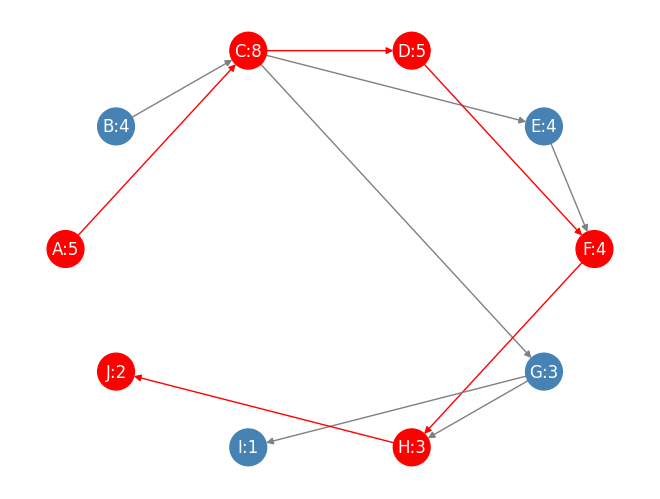


Done with step 4: Format and plot
Picture is stored as event_planning.csv.png


<Figure size 640x480 with 0 Axes>

In [52]:

###################
# Format and plot #
###################

# Set layout options and draw the graph using matplotlib
plt.figure()
pos = nx.shell_layout(G)
pos = {k: (v[0], -v[1]) for k, v in pos.items()}
node_col = ['red' if node in longest_path else 'steelblue' for node in G.nodes()]
edge_colors = ['red' if edge in edges_lp else 'grey' for edge in G.edges()]

# Draw DAG
nx.draw(G, pos, with_labels=True, font_color='white', edge_color=edge_colors,
        node_color=node_col, node_size=700)

# Save graph plot to file and display it
filename = filename + '.png'
plt.savefig(filename, format="PNG")
plt.show()
plt.clf()

# Print plot information
print('\nDone with step 4: Format and plot')
print(f'Picture is stored as {filename}')



<p1 align="left"><font color='orange'>Step 5: Generate summarized message</font></p1>  <a id='s5'></a> - [back to top](#top)

In [53]:

###########################
# Generate output message #
###########################

# Function to generate and print a summary of the critical path
def generate_summary(longest_path, longest_length, id_description_dict):
    summary = "The critical path consists of the following tasks:\n"
    
    for idx, task in enumerate(longest_path):
        task_id = task.split(':')[0]
        task_description = id_description_dict[task_id]
        task_duration = task.split(':')[1]
        summary += f"{idx + 1}. {task_id}: {task_description} ({task_duration} days)\n"
    
    summary += f"\nThe total duration of the critical path is {longest_length} days."
    
    return summary

# Function to generate and print a summary of the non-critical path
def generate_non_critical_summary(longest_path, id_description_dict):
    non_critical_summary = "The tasks NOT on the critical path are:\n"
    
    for id in id_description_dict:
        id_duration = id_to_name_dict[id]
        if id_duration not in longest_path:
            id_description = id_description_dict[id]
            id_duration = id_duration_dict[id_duration]
            non_critical_summary += f"{id}: {id_description} ({id_duration} days)\n"
    
    return non_critical_summary


# Generate the summary and print it
print(f'\nSUMMARY\n')
summary = generate_summary(longest_path, longest_length, id_description_dict)
print(summary)

# Generate the non-critical tasks summary and print it
print(f'\nREFERENCE\n')
non_critical_summary = generate_non_critical_summary(longest_path, id_description_dict)
print(non_critical_summary)


SUMMARY

The critical path consists of the following tasks:
1. A: Plan the event (Event Coordinator) (5 days)
2. C: Design promotional materials (Graphic Designer) (8 days)
3. D: Coordinate with suppliers (Purchaser) (5 days)
4. F: Print promotional materials (Printer) (4 days)
5. H: Distribute promotional materials (Retail Staff) (3 days)
6. J: Execute promotional event (Retail Staff) (2 days)

The total duration of the critical path is 27 days.

REFERENCE

The tasks NOT on the critical path are:
B: Select products (Purchaser) (4 days)
E: Prepare email content (Marketing) (4 days)
G: Assemble email campaign (Marketing) (3 days)
I: Launch email campaign (Marketing) (1 days)

